<a href="https://colab.research.google.com/github/GuptaRitik/Ted-talk-views-prediction/blob/main/TEDx_talks_views_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over
4,000 TED talks including transcripts in many languages.
Founded in 1984 by Richard Salman as a nonprofit organization
that aimed at bringing experts from the fields of Technology, Entertainment, and Design
together, TED Conferences have gone on to become the Mecca of ideas from virtually all
walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000
talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore,
Jimmy Wales, Shahrukh Khan, and Bill Gates.
The main objective is to build a predictive model, which could help in predicting the views of
the videos uploaded on the TEDx website.

#### This is the Regression problem as we need to predict Views (continous values), and there are various algorithm available which we are trying to model and choose the optimal model.  


## Overview of Data Attributes 

Attribute - Description

* talk_id - Talk identification number provided by TED


* title - Title of the talk string

* speaker_1 - First speaker in TED's speaker list

* speakers - Speakers in the talk 

* occupations - *Occupations of the speakers


* about_speakers - *Blurb about each
speaker


* recorded_date - Date the talk was
recorded



* published_date - Date the talk was
published to TED.com


* event - Event or medium in
which the talk was given



* native_lang - Language the talk was
given in



* available_lang - All available languages
(lang_code) for a talk


* comments - Count of comments 

* duration - Duration in seconds 

* topics - Related tags or topics
for the talk


* related_talks - Related talks
(key='talk_id',
value='title')


* url - URL of the talk 

* description - Description of the talk 

* transcript - Full transcript of the talk 


* **views -  Count of views (Target Variable)**

# Goal:- 

### Analysing the data, providing insights and build a predictive ML model to predict the views for any given data of videos. 

## Process towards Goal:-

* Importing necessary libraries (for Model building we're gonna  use scikit-learn)
* Importing dataset
* Data processing for EDA
* Exploratory data analysis
* Deriving insights and short conclusions
* Data Cleaning/Null value/missing value treatment 
* Feature engineering
* correlation and Feature Selection 
* Model building
* Hyperparameter tuning
* Comparision and selection of model
* conclusion

## *Importing Libraries*

In [190]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [191]:
# Data and EDA libraries
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from wordcloud import WordCloud
import squarify 
import math
%matplotlib inline

# Machine Learning libraries
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble
from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings("ignore")

In [192]:
df = pd.read_csv('/content/drive/MyDrive/Capstones/Data/ML-Regression/data_ted_talks.csv')
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.000000,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.000000,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.000000,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.000000,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.000000,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


## *Data processing for EDA*

In [193]:
df.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

Some of the features has null values, we can try checking each column for more details along with EDA

We found that **speaker_1** and **all_speaker** has same names, so its better if we can drop that since it not impacting our EDA and model.

In [194]:
# Dropping the all speaker column.

df.drop('all_speakers', axis=1, inplace=True)

Occupation has values as the key value pair, to perform better in EDA we have to convert this in the simple form.

In [195]:
# using eval to remove the external string to operate in dictionary inside it
df['occupations'] = df['occupations'].apply(lambda x: eval(x) if type(x) == str else 0)

# using the key, getting the names inside the dictionary, else setting as NaN
df['occupations'] = df['occupations'].apply(lambda x: x[0][0] if type(x) == dict else np.nan)


df['occupations'].head(3)

0                        climate advocate
1    global health expert; data visionary
2                    technology columnist
Name: occupations, dtype: object

#### Formating and transforming the irregularities in features

In [196]:
# applying "to datetime" function to convert string to date
df[['recorded_date', 'published_date']]	 = df[['recorded_date', 'published_date']].apply(pd.to_datetime)

# only assigning 2 values TEDx and TEd for relevant event
df['event'] = df['event'].apply(lambda x: 'TEDx' if 'TEDx' in x else 'TED')


# using Eval function to convert sring of list into list for proper EDA
df['available_lang'] = df['available_lang'].apply(lambda x: eval(x))

df['topics'] = df['topics'].apply(lambda x: eval(x))

df['related_talks'] = df['related_talks'].apply(lambda x: eval(x))


## *Exploratory Data Analysis*

#### Statistical overview of the numerical features in data

In [197]:
pd.set_option('float_format', '{:f}'.format)
df.describe()

,talk_id,views,comments,duration
count,4005.000000,4005.000000,3350.000000,4005.000000
mean,12432.538327,2148005.573783,161.997015,724.011236
std,17447.576262,3451225.523659,268.838922,361.775462
min,1.000000,0.000000,0.000000,60.000000
25%,1252.000000,882069.000000,38.000000,393.000000
50%,2333.000000,1375508.000000,89.000000,738.000000
75%,23777.000000,2133110.000000,188.000000,974.000000
max,62794.000000,65051954.000000,6449.000000,3922.000000


There are certainly 2 numerical features given in data, **views** is the Dependent variable, and the **talk id** is unique identifier of the video, so for furthr analysis we can leverage this column by makiing it as  the index to simplify the analysis using ".loc" method

In [198]:
# setting the id as index using set index method
df.set_index('talk_id',inplace=True)

### Analysing the Speaker, its occurances and impact on views, comments etc. 

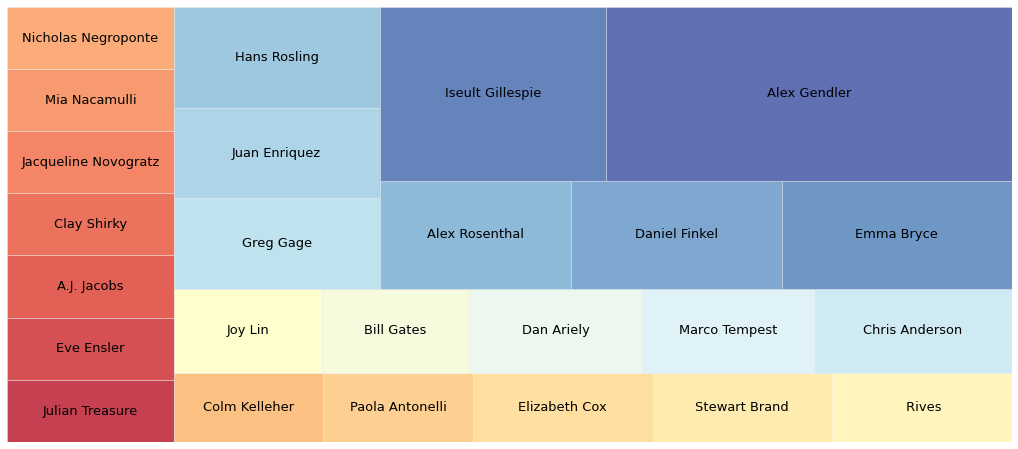

In [199]:
# storing the counts of top 25 speaker in a dataframe
speaker_counts = pd.DataFrame(
    df.speaker_1.value_counts().sort_values()) 


# storing the labels and values individually for tree map
a = speaker_counts.tail(25).index.tolist()
d = speaker_counts.tail(25).values.flatten().tolist()  #using tail because its sorted in ascending order

#plotting the tree map with squarify library
plt.rcParams['figure.figsize'] = [18, 8]
plt.style.use('ggplot')

squarify.plot(sizes=d,label=a, alpha=.8, 
              text_kwargs={'fontsize': 13, 'color': 'black'},
              color=sns.color_palette("RdYlBu", len(d)))

plt.axis("off")
plt.show()

Alex Gendler and Iseult Gillespie have the most number of occurance in events as speaker

### Percentage Repeatation of speakers

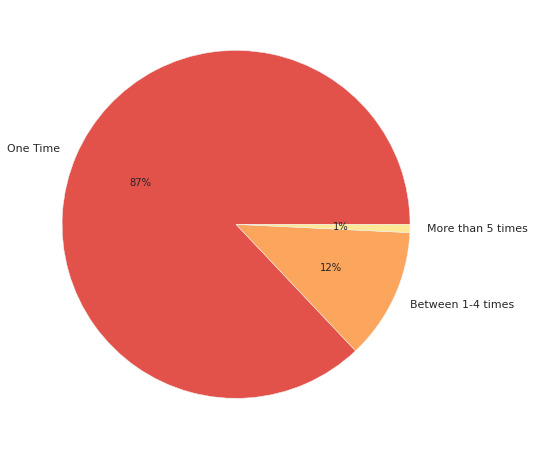

In [200]:
# plotting pie chart for the percentage of speakers who repeated in ted shows

only1 = len(speaker_counts[speaker_counts['speaker_1']==1]) # counts of appearing only 1 times
less_than5 = len(speaker_counts[(speaker_counts['speaker_1']>1) & (speaker_counts['speaker_1']<5)]) # counts of appearing between 1 and 4  times
more_than5 = len(speaker_counts[speaker_counts['speaker_1']>=5]) # counts of appearing more than 5 times
total = len(speaker_counts) # total length of unique speakers

data = [round(only1/total*100,2), round(less_than5/total*100,2), round(more_than5/total*100,2)] # calculating the percentage of counts
labels = ['One Time', 'Between 1-4 times', 'More than 5 times'] # lable names
colors = sns.color_palette('Spectral')[0:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.00f%%')
plt.show()

We see that only 1% of total speakers were repeated more than 5 times, but there's a descent range for speakers who are reappeared between 1-4 times that is 12%, but yes 87% of speakers are new for event.

### Analysing top 20 Speakers with highest average views

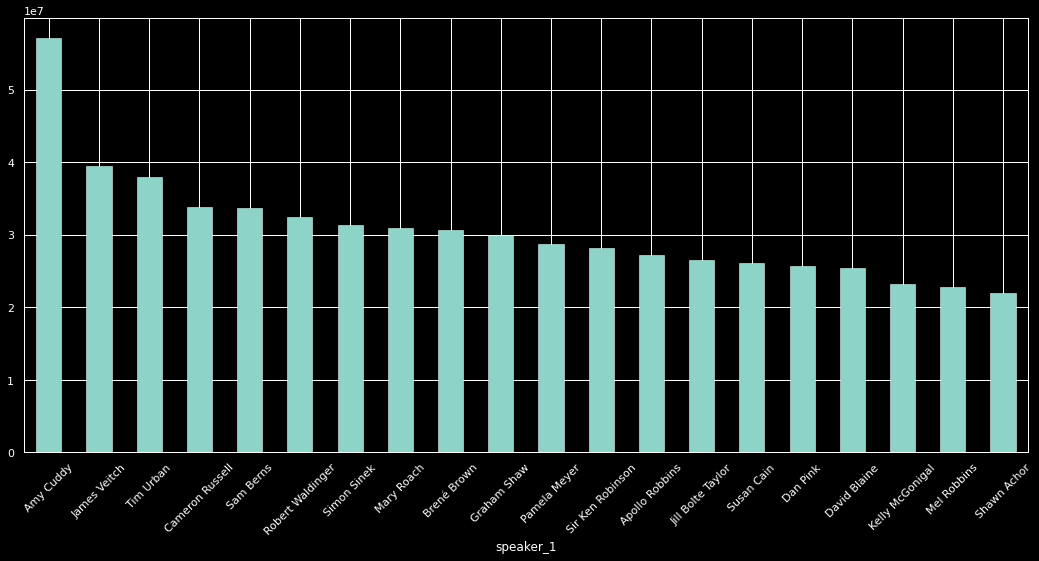

In [201]:
# Plotting the top 20 speakers with most views from the given data 
plt.style.use('dark_background') # changing the style to dark 
df.groupby('speaker_1')['views'].mean().sort_values(ascending=False).head(20).plot(kind='bar') #grouping by the speaker with their mean to find top 20 
plt.xticks(rotation=45) 
plt.show()

Amy Cuddy has the highest views for its video, can be various reasons for this, popularity must be the top.

### Popular occupations with their views and comments

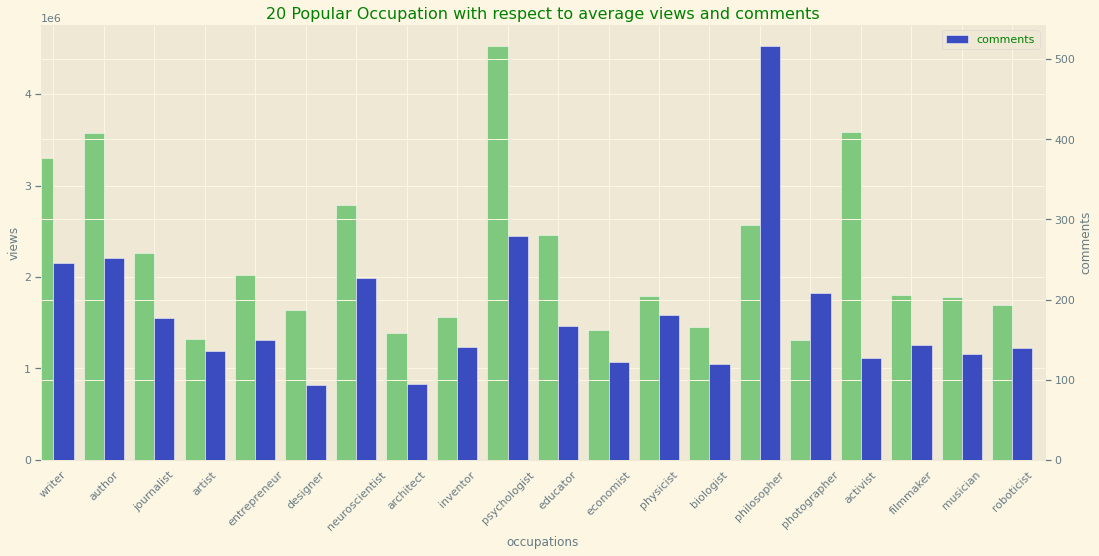

In [202]:
# grouping the occupation and applying some aggregate functions like count, mean and storing in temp dataframe

occupation_df = df.groupby('occupations').agg(
    {'occupations':'count', 'views':'mean', 'comments':'mean' }).fillna(0) # filling the NaN with 0 for now

# changing the column name as it has duplicate column name
occupation_df.columns.values[0] = "counts"

# storing only top 20 in the dataframe by popularity
occupation_df = occupation_df.sort_values('counts', ascending=False).head(20)
occupation_df.drop('counts', axis=1, inplace=True)


# started plotting
plt.style.use('Solarize_Light2') # setting the theme of matplotlib
plt.rcParams.update({'text.color': "green"}) # formatting the colors

ax = plt.figure().add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

occupation_df.views.plot(kind='bar', ax=ax,colormap='Accent', width=width, position=1, rot= 45) # the frist axis bar chart of views with y on left side 
occupation_df.comments.plot(kind='bar', ax=ax2, colormap='coolwarm', width=width, position=0) # second axis bar chart of comments with y axis on right side
ax.set_ylabel('views')
ax2.set_ylabel('comments')
plt.title('20 Popular Occupation with respect to average views and comments')
plt.legend()
plt.show()

there were some insights we got from here are, 
* Highest viewed profession is **Psychologist** followed by **activist** and **author**
* most comments is on **Philosopher**, maybe asking questions in comments is the reason.


### Average Views and comments on Yearly basis and Average Duration of video over years

[]

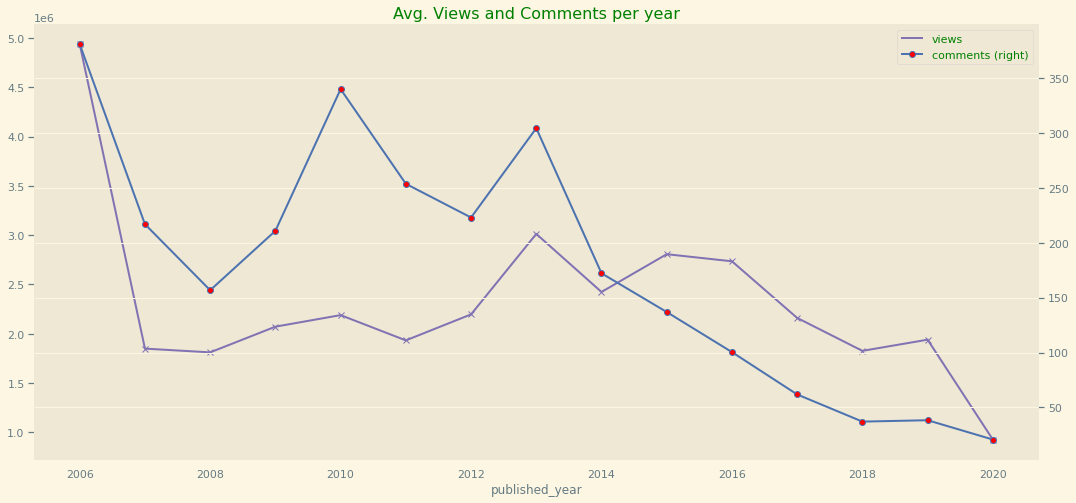

In [203]:
# Creating a column of publishing year from the published date column

df['published_year'] = pd.DatetimeIndex(df['published_date']).year

# plotting the two plots for avrage views and average comments for each year
df.groupby('published_year')['views'].mean().plot(marker = 'x', markerfacecolor = 'red', color='m', legend=True)
df.groupby('published_year')['comments'].mean().plot(secondary_y=True, marker = 'o', markerfacecolor = 'red', color= 'b', legend=True)
plt.title('Avg. Views and Comments per year')

plt.plot()

Average Views are higher in the statnig years, but now they are decreased, also the comments are somewhat consistent till 2014 then they started declining.

[]

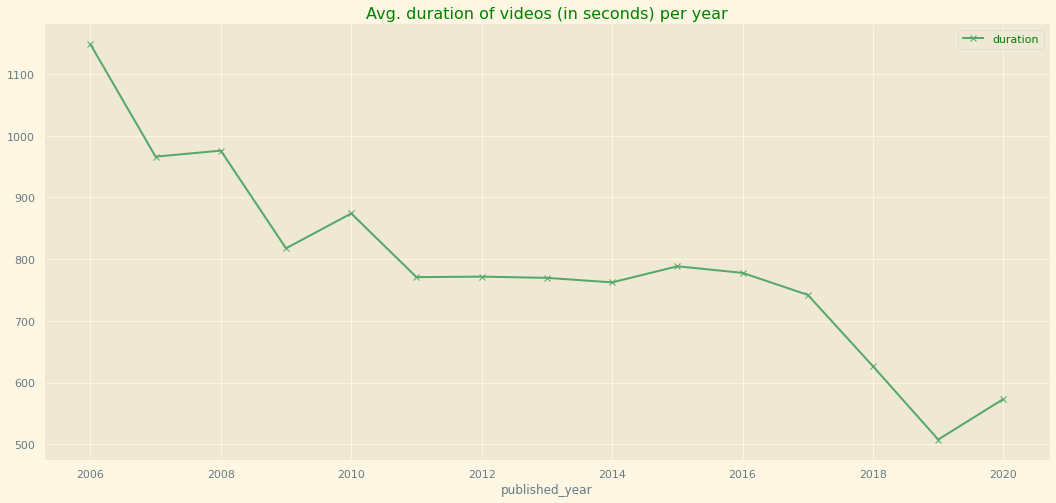

In [204]:
# Plotting the Average duration thorught the years of ted talks

df.groupby('published_year')['duration'].mean().plot(
                    marker = 'x', markerfacecolor = 'red', color='g', legend=True)

plt.title('Avg. duration of videos (in seconds) per year')
plt.plot()

We see that average duration for videos are slowly decreasing maybe because of  the attention span of humans are going down.

### Views with respect to type of Events

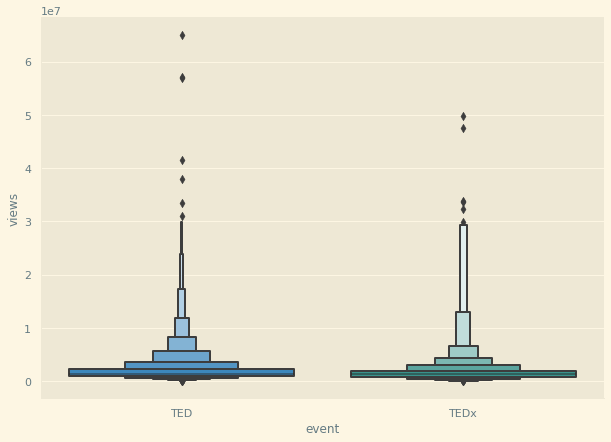

In [205]:
# plotting a boxen plot, a detailed version of box plot
sns.catplot(data=df, x="event", y="views", kind='boxen', height = 6.25, aspect=11/8)

We can conclude that Both events has similarity in views but TEDx has slightly wide area between 1.5 and 3 meaning there has more no. of views compare to TED. 

### Average views based on available languages

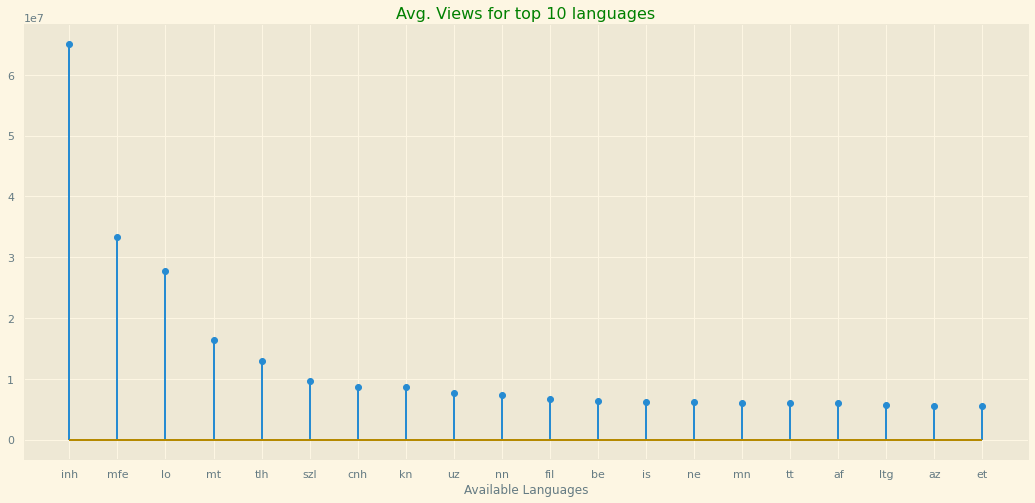

In [206]:
# calculating the average views per language available using the explode function to get all values from list of languages.

avb_lang = df.explode('available_lang').groupby(
    'available_lang')['views'].mean().sort_values(ascending=False).head(20)

# storing labels and values in differnet variable for the plotting purpose
label = avb_lang.index.tolist()
val = avb_lang.values.tolist()

plt.stem(label,val)
plt.title('Avg. Views for top 10 languages')
plt.xlabel('Available Languages')
plt.show()

**inh**, **mfe**, **lo** are the 3 top most languages with highest average views

### The most frequent topics in the show

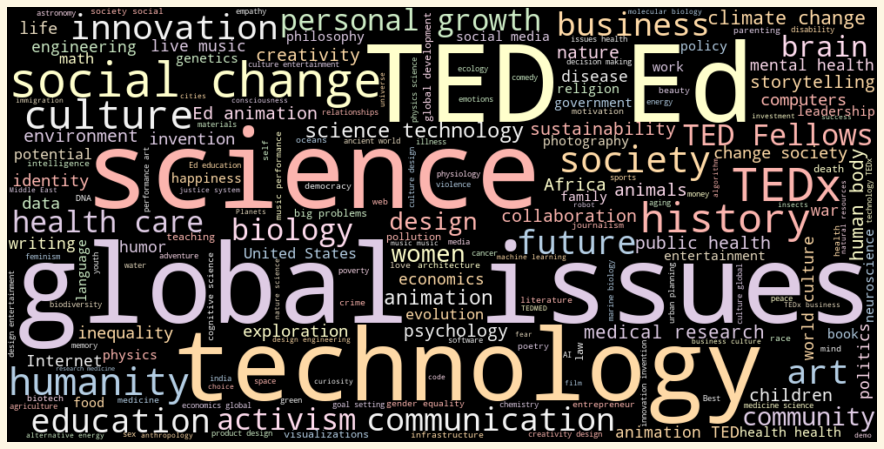

In [207]:
# adding all the words in topics into the text as a string to pass in the word cloud.

text = '+'.join(df['topics'].explode())

# creating a wordclound object and assigning paramenters
wordcloud = WordCloud(width = 1000, height = 500, 
                      random_state=1, background_color="black",
                      colormap="Pastel1")

# generating word clound by its object
wordcloud.generate(text)

# Display the generated Word Cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

TED-Ed, Science, Gloabal Issues, Technology are among the most frequent topics for show followed by plenty of others.

#### Lets see which topic has highest views

In [208]:
# getting the 10 max viewed topics in a series
top_topic = df.explode('topics').groupby(
    'topics')['views'].max().sort_values(
        ascending=False).head(10)

# converting the series to list
top_topic = top_topic.index.tolist()

print(f'Top 10 highest viewed topics are {top_topic}.')

Top 10 highest viewed topics are ['creativity', 'culture', 'dance', 'parenting', 'teaching', 'education', 'children', 'self', 'success', 'science'].


### Distribution of Views and Comments and duration 


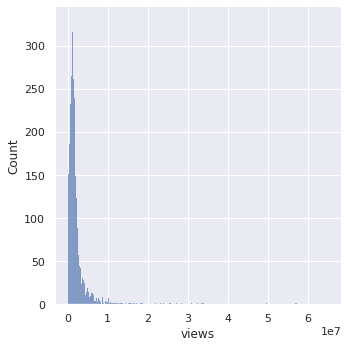

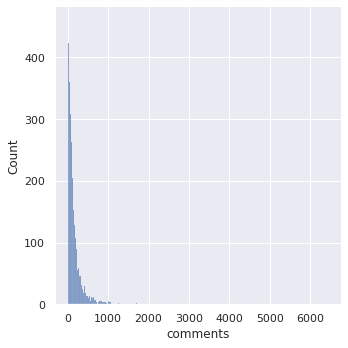

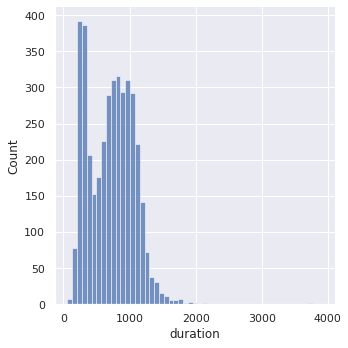

In [209]:
# keeping numerical features in a list
num_col = ['views', 'comments', 'duration']

sns.set(rc={'figure.figsize':(9,7)})

#plotting the distribution for each feature in list
for i in num_col:
  sns.displot(df[i])    #height=6.27, aspect=11.7/8.27
  plt.xlabel(i)
  plt.show()


**Views** and **Comments** are right skewed curves 

### Relation with Dependent variable

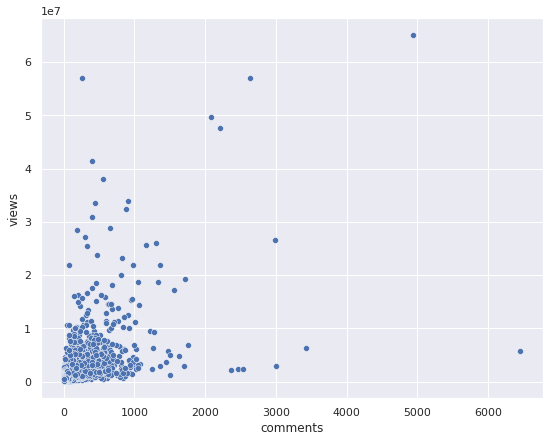

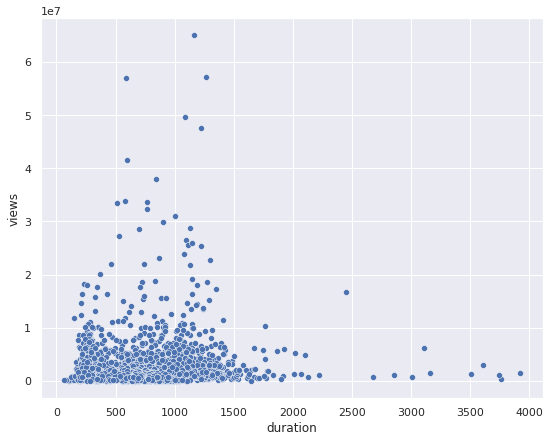

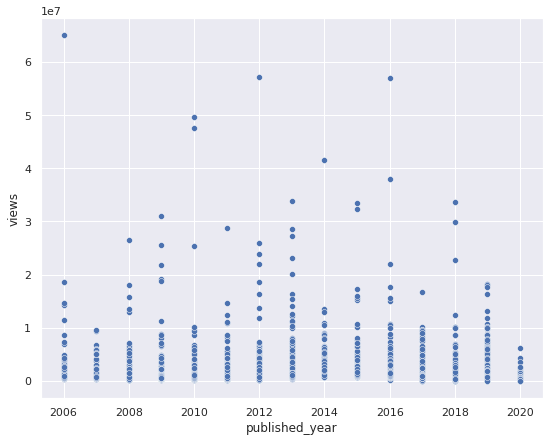

In [210]:
# scatterplot for checking the relation with our dependent variable "Views"


for i in ['comments', 'duration', 'published_year']:
  sns.scatterplot(x=i, y = 'views', data=df)
  plt.show()

* There has been not a clear relation between these variable with target variable, but feature engineering may help to get a good understanding of hidden relations.

## *Data Cleaning, Outliers and Null/Missing value treatment*

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4005 entries, 1 to 62794
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           4005 non-null   object        
 1   speaker_1       4005 non-null   object        
 2   occupations     3483 non-null   object        
 3   about_speakers  3502 non-null   object        
 4   views           4005 non-null   int64         
 5   recorded_date   4004 non-null   datetime64[ns]
 6   published_date  4005 non-null   datetime64[ns]
 7   event           4005 non-null   object        
 8   native_lang     4005 non-null   object        
 9   available_lang  4005 non-null   object        
 10  comments        3350 non-null   float64       
 11  duration        4005 non-null   int64         
 12  topics          4005 non-null   object        
 13  related_talks   4005 non-null   object        
 14  url             4005 non-null   object        
 15  des

### Removing records with 0 views and removing the unnecessary features frame dataframe

In [212]:
# only considering the views which are non zero for our modeling
df = df[df.views != 0]

# removnig unnecessasy coloumns
unimportant_col = ['title','about_speakers', 'url', 'native_lang', 'description', 'transcript']
df = df.drop(unimportant_col, axis=1)

df.head(3)

,speaker_1,occupations,views,recorded_date,published_date,event,available_lang,comments,duration,topics,related_talks,published_year
talk_id,,,,,,,,,,,,
1,Al Gore,climate advocate,3523392,2006-02-25,2006-06-27,TED,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",272.000000,977,"[alternative energy, cars, climate change, cul...","{243: 'New thinking on the climate crisis', 54...",2006
92,Hans Rosling,global health expert; data visionary,14501685,2006-02-22,2006-06-27,TED,"[ar, az, bg, bn, bs, cs, da, de, el, en, es, e...",628.000000,1190,"[Africa, Asia, Google, demo, economics, global...","{2056: 'Own your body's data', 2296: 'A visual...",2006
7,David Pogue,technology columnist,1920832,2006-02-24,2006-06-27,TED,"[ar, bg, de, el, en, es, fa, fr, he, hr, hu, i...",124.000000,1286,"[computers, entertainment, interface design, m...","{1725: '10 top time-saving tech tips', 2274: '...",2006


* Removed some unimportant categorical column and removed the native language because "available_lang" is presented for our feature engineering task.

Filling Nulls of **Occupation** with "others"

In [213]:
# using 'Others
df = df.fillna({"occupations": 'other'})

Null of **recorded_date**

Since there's only 1 value that is missing in recored_date column, i can fill it with help of related talk's averge time to reach given views.

In [214]:
df[df['recorded_date'].isna()]  # checking the related talk id from the null record

,speaker_1,occupations,views,recorded_date,published_date,event,available_lang,comments,duration,topics,related_talks,published_year
talk_id,,,,,,,,,,,,
56629,Marilyn Waring,economist,1276272,NaT,2020-01-23,TEDx,"[en, es, fr, it, ko, pt, tr, vi, zh-cn, zh-tw]",20.000000,1039,"[global development, development, social chang...",{46582: 'Why governments should prioritize wel...,2020


In [215]:
df.loc[46582][['views','recorded_date', 'published_date']] # analysing the related id recorded and published date to get an idea

views                         2076985
recorded_date     2019-07-21 00:00:00
published_date    2019-07-29 00:00:00
Name: 46582, dtype: object

In [216]:
# fillng the date with the intuiton that this number of views can get in 4 days compare to related talks date
df = df.fillna({'recorded_date': pd.Timestamp('20200119')}) 

#### Usaing KNN imputer to fill Null values of **comments**

In [217]:
# using the numerical columns as the nerest neighbours for the model to impute null values
nn_data = ['views', 'comments', 'duration', 'published_year']

# as the scales vary in different featurs, it create problem for KNN to calculate distance, so standardise the values is must. 
scaler = MinMaxScaler()

# define imputer
imputer = KNNImputer()

#fitting the model
imputer.fit(scaler.fit_transform(df[nn_data]))

# transform the dataset
df[nn_data] = imputer.transform(scaler.fit_transform(df[nn_data]))

#again applying inverse_transform on the data
df[nn_data] = scaler.inverse_transform(df[nn_data])

In [218]:
# this is not necessary for us now so we can drop it
df = df.drop('published_year', axis=1)

We choose to do outlier treatment after the feature engineering, as there are less than 3 numerical column so, after feature enigneering it is more useful. it also ensure that our features are not biased anyway

## *Feature engineering*

#### Lets add a feature for average views of **speaker_1** this hep us to predict the views of particular video.

In [219]:
# storing mean of every unique speaker
speaker_view=df.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
speaker_view=speaker_view.to_dict().values() # converting it to dictionary 

speaker_view=  list(speaker_view)[0] # converting the values into a list
df['avg_speaker_view']=df['speaker_1'].map(speaker_view) #mapping the average views of unique speaker in the dataframe

df = df.drop('speaker_1', axis=1) 

#### **Occupations** is important for views so, we assign the weight to each occupation as per their contribution in average views.

In [220]:
# assigning the rank, minimum number is for the least important and maximum is for the highest average viewed occupation
weight_df = df.groupby('occupations')['views'].mean().sort_values().rank().reset_index() # rank method is used on groupby of average of occupations

df['talk_id'] = df.index
# merging the rank into the original dataframe
df = df.merge(weight_df, on='occupations', how='left').rename(columns = {'views_x': 'views' ,'views_y': 'weighted_occupation'})
df = df.drop('occupations', axis=1)

df.set_index('talk_id', inplace=True) # after merging set this id as index again

### Feature engineering on Date attributes

In [221]:
# substracting the 2 dates to get the number of days this video takes to became published.
df['days_taken_to_publish'] = (df.loc[:,'published_date']-df.loc[:, 'recorded_date']).dt.days


# getting the age of video from the very last date in dataset and converting result of days into months
df['age_of_video(in_month)'] = (((df.published_date.max() - df.published_date)/np.timedelta64(1, 'M')))
df['age_of_video(in_month)'] = df['age_of_video(in_month)'].astype(int) # converting the values into integer


# creating column as weekday name of published date
df['published_weekday'] = pd.Series(df.published_date).dt.day_name()

#removing both dates column as they are not used further 
dates = ['published_date', 'recorded_date']
df = df.drop(dates, axis=1)

### Let's Label encode the "event" column

In [222]:
# encoding 0 for TED and 1 for TEDx events
df.loc[:,'event'] = df.event.map({'TED':0, 'TEDx':1})

### lets add a column for no. of available languages for a video

In [223]:
# storing length of available languages of video
df['available_lang'] = df['available_lang'].apply(lambda x: len(x))

### Adding a feature of topic wise average views given for each video

In [224]:
# getting the average views of each unique topic
topic_wise_avg_view = df.explode('topics').groupby('topics')['views'].mean()
topic_wise_avg_view = topic_wise_avg_view.to_dict() # converting the result into dictionary 

# adding each topics average views of a given video into new column
row_avg_topic_veiw = [] #list to store final average views 
for i in range(0,len(df)):
  avgs = 0
  topics_list = df['topics'].iloc[i] #his is a lsit of topic for given video
  for topic in topics_list:
    avgs+= topic_wise_avg_view[topic]
  row_avg_topic_veiw.append(round(avgs/len(topics_list),4)) #appending the sum of average and divided by length of total topics for given video
  
series = pd.Series(row_avg_topic_veiw) #converting the list to series
df['avg_topic_view']  = series.values #adding the new column with the average values

# dropping the topic column
df = df.drop('topics', axis=1)

### Related Talk engineering
* this are key vlaue pairs of video id and name, we can find the average of all related talks views to store in new column that may help to predict views accurately

In [225]:
df['related_talks'][3]

{127: 'Want to help Africa? Do business here',
 1929: 'We need money for aid. So let’s print it.',
 584: 'New rules for rebuilding a broken nation',
 270: 'The "bottom billion"',
 152: 'Aid versus trade',
 1321: 'In defense of dialogue'}

In [226]:
# usng a lopp to iterate over each row and verage the given related talk id views
related_view_final = []

for i in range(0, len(df)):
  related_view = 0
  related_dict_keys = df['related_talks'].iloc[i].keys() #getting the talk id which is key in dictionary
  for talk_id in related_dict_keys:
    if talk_id in df.index:
      related_view += df.loc[talk_id]['views'] # adding the related talk id's views
    else:
      related_view+=0  # if id is removed when we removed missing values, we asign it as 0

  related_view_final.append(round(related_view/len(related_dict_keys),4)) # appending the average view of related talk id's in the list

series = pd.Series(related_view_final) # converting list to series
df['related_views'] = series.values # adding the new column

# dropping the column 
df = df.drop('related_talks', axis=1) 

In [227]:
df.head()

,views,event,available_lang,comments,duration,avg_speaker_view,weighted_occupation,days_taken_to_publish,age_of_video(in_month),published_weekday,avg_topic_view,related_views
talk_id,,,,,,,,,,,,
1,3523392.000000,0,43,272.000000,977.000000,2190599.250000,1113.000000,122,166,Tuesday,1754680.477900,1659584.833300
92,14501685.000000,0,49,628.000000,1190.000000,3987156.100000,1432.000000,125,166,Tuesday,2291814.917000,1573950.666700
7,1920832.000000,0,26,124.000000,1286.000000,2156189.750000,1213.000000,123,166,Tuesday,1918468.899500,3051136.666700
53,2664069.000000,0,35,219.000000,1116.000000,1979411.000000,1152.000000,121,166,Tuesday,1642823.649300,1053294.833300
66,65051954.000000,0,62,4931.000000,1164.000000,28126839.333333,1410.000000,122,166,Tuesday,2905009.177500,5517750.500000


### Outlier treatment for numerical columns

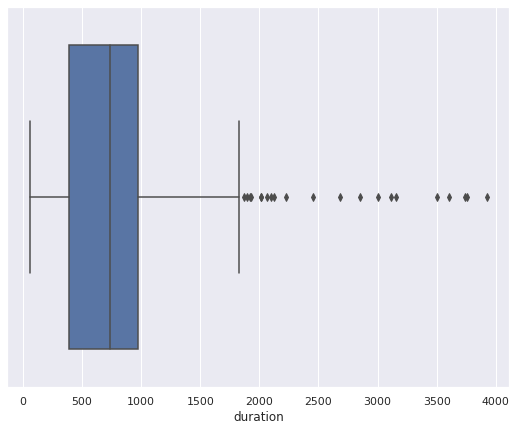

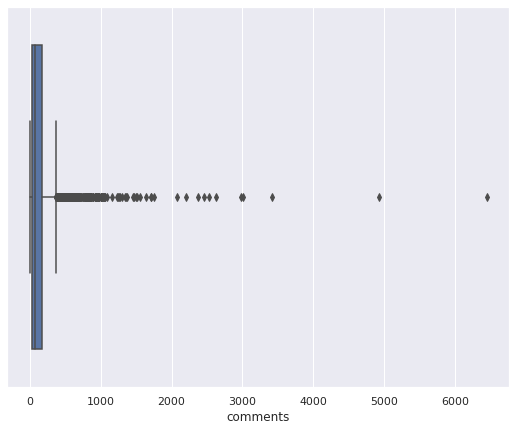

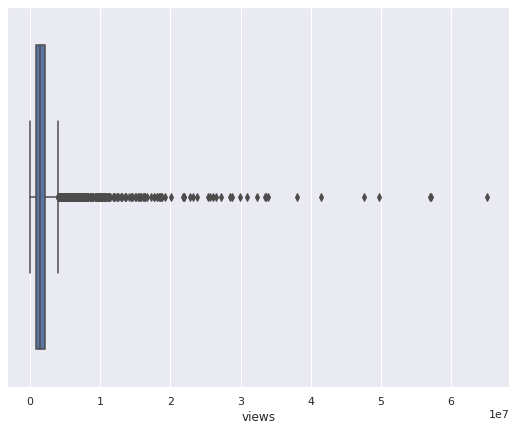

In [228]:
# boxplot for outliers for main columns
for i in ['duration', 'comments', 'views']:
  sns.boxplot(x = i, data=df)
  plt.show()


* Outliers are major concerns for model since its not able to learn efficiently, so we have to treat it well

#### We are going to replace all outliers with upper quartile

In [229]:
# Replacing outliers with extreme values for each numerical column
for i in ['views', 'available_lang', 'comments', 'duration', 'weighted_occupation', 'days_taken_to_publish', 
          'age_of_video(in_month)', 'avg_topic_view', 'related_views', 'avg_speaker_view']:

# storing the quantiles
  Q1 = df[i].quantile(0.25) 
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  #updating the values where they are away from the IQR range with the uppeer IQR itself
  df[i]=np.where(df[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(df[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),df[i]))

### One Hot encoding 

In [230]:
# unig pandas get dummies function to convert values into column
df = pd.get_dummies(df, prefix='published_on', drop_first=True) # using drop first to remove multicolinieariy between all new columns

* One Hot Encoding us used to convert categortical values into numerical by adding them as columns with their respective appearences as 1 else 0

In [231]:
# plotting a pair plot to visualise realtion between features

# sns.pairplot(df[['views', 'event', 'available_lang', 'comments', 'duration',
#        'weighted_occupation', 'days_taken_to_publish',
#        'age_of_video(in_month)', 'avg_topic_view', 'related_views']],height=2)

## *Correlation and Feature Selection*

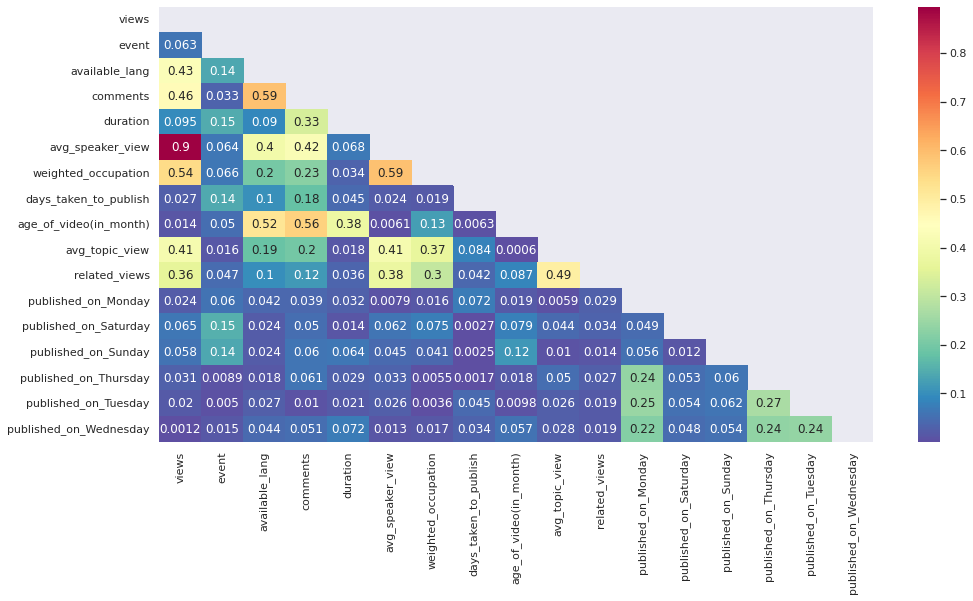

In [232]:
# getting the correlation matrix
corr= abs(df.corr())
matrix = np.triu(corr) # trimming the above triangle of matrix 

# plotting it as the heatmap
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.heatmap(corr,annot=True, cmap='Spectral_r', mask=matrix)



* We can see that No. of Available languages is correlated with age of video more than approx 0.5, will see important featurss in feature selection technique

In [233]:
# storing the independent and depentdeant vairable seperatly
X=df.drop('views', axis=1)
y=df['views']

#### Feature Importance thorugh f_regression technique

In [234]:
f_scores = f_regression(X, y)
f_scores

(array([1.57029940e+01, 9.26541559e+02, 1.07959399e+03, 3.63712641e+01,
        1.61109530e+04, 1.66844363e+03, 2.91195788e+00, 7.88127773e-01,
        8.15827533e+02, 6.07035341e+02, 2.34760983e+00, 1.71307661e+01,
        1.34121278e+01, 3.83574058e+00, 1.59328523e+00, 5.72167028e-03]),
 array([7.54001540e-005, 3.25222388e-183, 8.24123786e-210, 1.77864816e-009,
        0.00000000e+000, 3.92597951e-305, 8.80027557e-002, 3.74720264e-001,
        1.88197522e-163, 6.65889322e-125, 1.25554403e-001, 3.56115724e-005,
        2.53239132e-004, 5.02402697e-002, 2.06931038e-001, 9.39707927e-001]))

Text(0.5, 1.0, 'P-value for attributes')

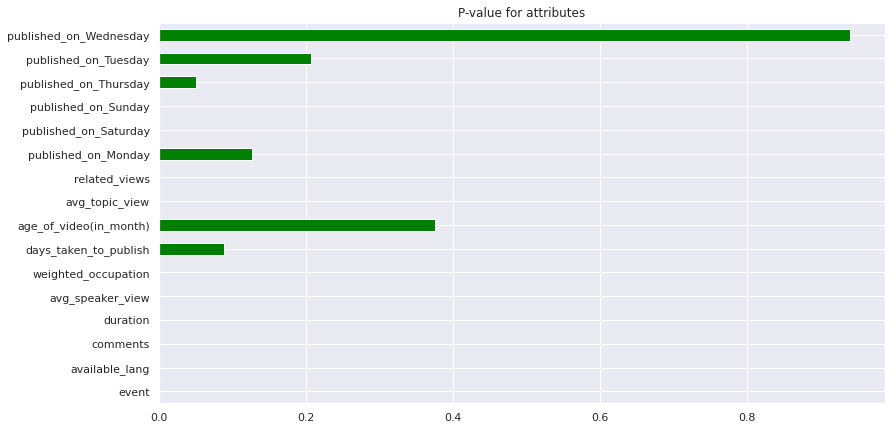

In [235]:
plt.figure(figsize=(13,7))
#seond array has the p-values, which is needed for feature importance

p_values= pd.Series(f_scores[1],index = X.columns)
p_values.plot(kind='barh',color='green')
plt.title('P-value for attributes')

* **published_on_wednesday** and **age_of_video** has p-vlaue that concern us so we can eliminate these from further processing.

In [236]:
# droppnig the unimportant feature
X = X.drop(['published_on_Wednesday', 'age_of_video(in_month)'], axis=1)

### Train Test Splitting and Scaling our Features

In [237]:
# splitting the data with test size as 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Scaling our independent features by standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We can also log tranform "Y" our target variable, didnt do it now

__________________________________________________________

## *Model Building*

We are going to use below mentioned models:-
* Lasso Regression 
* Ridge Regression
* Decision Tree Regressor
* Random Forest 
* Gradient boosting
* XGB Regressor
* K Neighbor regressor
* Support Vector Machine

Metrices to be measure:-
* R2
* RMSE
* MAE

In [238]:
# Defining a function to calculate all scores at once

def all_scores(model, x_train, y_train, x_test, y_test):

  # storing train and test predicted values
  train_pred = model.predict(x_train)
  test_pred = model.predict(x_test)

  # calculating different scores
  train_r2 = r2_score(y_train, train_pred)
  test_r2 = r2_score(y_test, test_pred)

  train_RMSE = mean_squared_error(y_train, train_pred, squared=False)
  test_RMSE = mean_squared_error(y_test, test_pred, squared=False)
  
  train_MAE = mean_absolute_error(y_train, train_pred)
  test_MAE = mean_absolute_error(y_test, test_pred) 

  # getting all results as a tuple
  scores = train_r2, train_RMSE, train_MAE, test_r2, test_RMSE, test_MAE
  
  return scores 

### **Models with Default Parameters**
(Without Hyperparameter tuning)

In [239]:
# adding all default models in a list
models = [('Lasso', Lasso()), ('Ridge', Ridge()), ('Decision Tree', DecisionTreeRegressor()), 
          ('Random forest', RandomForestRegressor()), ('Gradient Boost', GradientBoostingRegressor()), 
          ('XG Boost', xgb.XGBRegressor()), ('KNN', neighbors.KNeighborsRegressor()), ('Support Vector', SVR())]

# creatih emptly list and dataframe to store later
lst = []
name_lst = []
feature_imp_lst = []
models_data = pd.DataFrame()

# runnig for loop for each model to be trained and predict and calculate scores 
for name, model in models:
  model.fit(X_train, y_train)
  scores = all_scores(model, X_train, y_train, X_test, y_test) # using the function we defined above
  lst.append(scores)
  name_lst.append(name)
  # calculatig feature importance for 3 regressors 
  if name in ['Decision Tree', 'Random forest', 'XG Boost']:
    feature_imp_lst.append((name, model.feature_importances_)) #storing all in a list



# adding all the scores from list into dataframe
models_data['Model'] = name_lst
scores_df = pd.DataFrame(lst, columns=['train_r2', 'train_RMSE', 'train_MAE', 'test_r2', 'test_RMSE', 'test_MAE'])
models_data = pd.concat([models_data, scores_df], axis=1)

models_data

[18:00:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Model,train_r2,train_RMSE,train_MAE,test_r2,test_RMSE,test_MAE
0,Lasso,0.815646,475099.602720,264386.647886,0.816307,463941.933932,261256.744277
1,Ridge,0.815646,475099.756286,264525.067132,0.816322,463922.997033,261385.290661
2,Decision Tree,1.000000,0.000000,0.000000,0.731065,561359.826188,275708.992188
3,Random forest,0.977759,165021.530835,81458.990254,0.854517,412879.615436,206068.850200
4,Gradient Boost,0.901707,346912.935203,179431.161659,0.854377,413078.222853,211214.321966
5,XG Boost,0.898855,351910.312477,180496.695525,0.863784,399514.120264,204730.060437
6,KNN,0.832810,452443.261639,304780.633276,0.725436,567204.573574,392778.158500
7,Support Vector,-0.071376,1145328.028768,835985.802941,-0.066677,1117979.756202,825600.070133


### Plotting Feature importancwe with respect to models

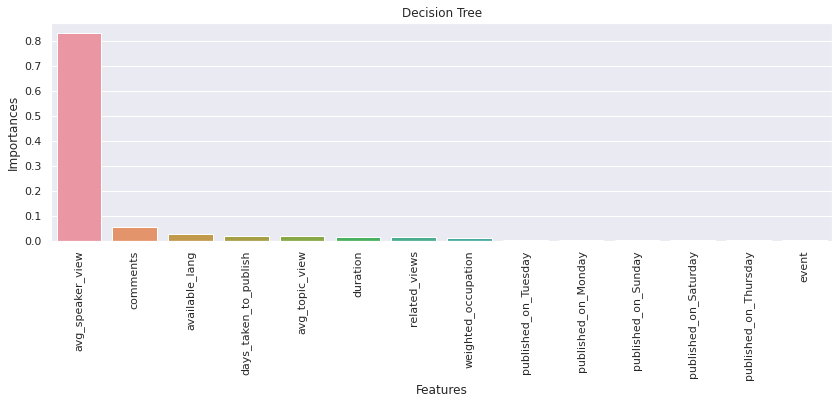

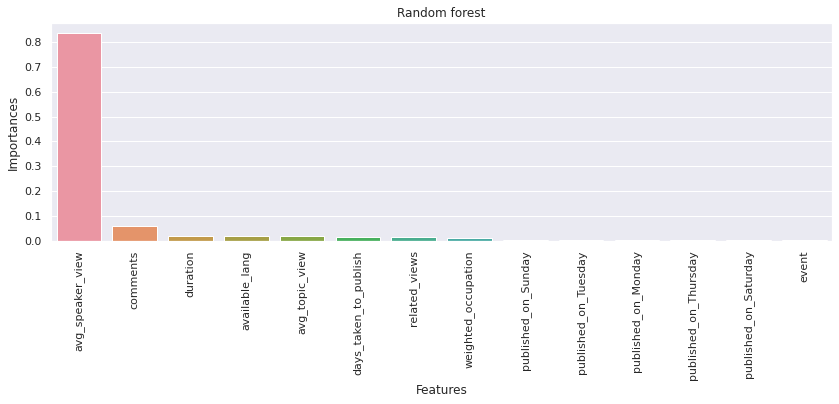

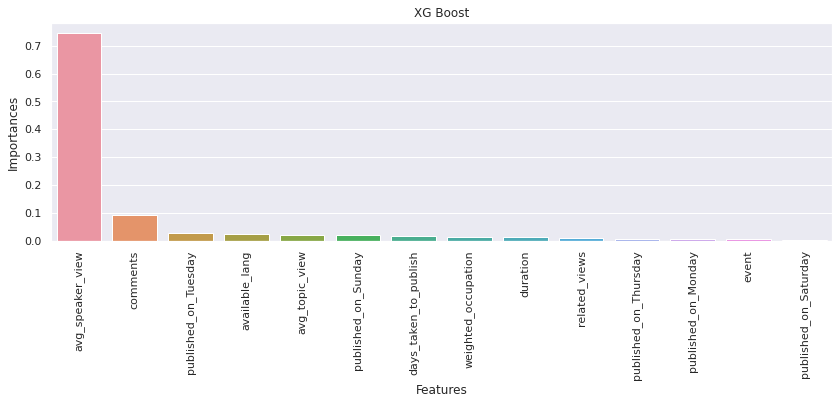

In [240]:
# running a loop for adding feature and importance in a dataframe
for i in range(len(feature_imp_lst)):
  importances = pd.DataFrame({'Features': X.columns, 
                                  'Importances': feature_imp_lst[i][1]})
      
  importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
  
  # plotting the values rom dataframe as barplot
  fig = plt.figure(figsize=(14, 4))
  sns.barplot(x='Features', y='Importances', data=importances)
  plt.title(feature_imp_lst[i][0])
  plt.xticks(rotation='vertical')
  plt.show()